In [206]:
# sklearn
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.ensemble import IsolationForest



# standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
import neurokit2 as nk
import heartpy as hp


# utils
from tqdm import tqdm


In [207]:
def score(y_true, y_hat):
    F1 = f1_score(y_true, y_hat, average='micro')
    return F1

# Load Data

In [208]:
df_train = pd.read_csv('X_train.csv', index_col='id')
df_train['y'] = pd.read_csv('y_train.csv', index_col='id').values
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841,y
id,,,,,,,,,,,,,,,,,,,,,
0,-64,-66,-69,-72,-75,-77,-80,-86,-89,-83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,505,500,496,492,487,480,475,476,483,495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-21,-16,-12,-7,-3,0,1,2,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-211,-457,-635,-710,-715,-663,-573,-481,-401,-337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,36,32,29,25,22,19,17,15,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [209]:
df_test = pd.read_csv('X_test.csv', index_col='id')
df_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17832,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841
id,,,,,,,,,,,,,,,,,,,,,
0,30,29,28,27,26,24,24,28,38,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-75,-72,-70,-67,-64,-61,-59,-56,-53,-51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,264,280,289,293,298,302,306,308,309,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-377,-380,-383,-385,-388,-391,-394,-397,-400,-402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-69,-67,-66,-65,-65,-66,-68,-70,-73,-76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_train, df_val = train_test_split(df_train, stratify=df_train['y'], random_state=0)
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841,y
id,,,,,,,,,,,,,,,,,,,,,
514,4,9,30,85,158,238,313,376,394,401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3054,-7,-1,4,8,10,7,2,-3,-10,-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3485,-7,-11,-12,-10,-3,4,10,19,26,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
649,3,5,7,8,9,9,10,11,13,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
185,-52,-45,-39,-35,-33,-31,-30,-30,-29,-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [211]:
print(f'Train shape: {df_train.shape}\nValidation shape: {df_val.shape}\nTest shape: {df_test.shape}')

Train shape: (3837, 17843)
Validation shape: (1280, 17843)
Test shape: (3411, 17842)


# Explore data

<AxesSubplot:>

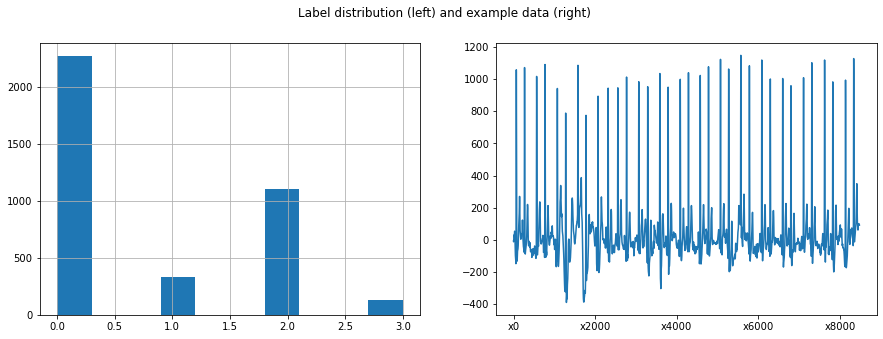

In [212]:
# Plot label Distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Label distribution (left) and example data (right)')
df_train['y'].hist(ax=axes[0])
df_train.iloc[2, :-2].plot(ax=axes[1])

In [213]:
df_train['y'].value_counts()/len(df_train['y'])*100

0    59.212927
2    28.798541
1     8.652593
3     3.335940
Name: y, dtype: float64

In [214]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841,y
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3837.000000
mean,4.838415,3.852228,3.068543,2.399792,2.143341,2.528538,3.126922,3.702893,4.453740,5.305708,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,0.762575
std,339.591322,338.418022,337.598593,338.130694,339.613389,342.265429,345.922125,349.737888,353.229867,356.758749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978484
min,-5888.000000,-5849.000000,-5750.000000,-5638.000000,-5515.000000,-5379.000000,-5233.000000,-5168.000000,-5760.000000,-6279.000000,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,0.000000
25%,-91.000000,-91.000000,-91.000000,-90.000000,-89.000000,-88.000000,-86.000000,-86.000000,-87.000000,-87.000000,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,0.000000
50%,-9.000000,-10.000000,-11.000000,-10.000000,-10.000000,-10.000000,-9.000000,-8.000000,-9.000000,-9.000000,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,0.000000
75%,86.000000,85.000000,84.000000,83.000000,85.000000,85.000000,84.000000,84.000000,83.000000,83.000000,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,2.000000
max,5471.000000,5487.000000,5470.000000,5452.000000,5437.000000,5432.000000,5431.000000,5429.000000,5427.000000,5410.000000,...,-120.0,-118.0,-116.0,-115.0,-114.0,-113.0,-112.0,-111.0,NaN,3.000000


In [215]:
df_train[df_train['y'] == 3]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841,y
id,,,,,,,,,,,,,,,,,,,,,
818,17,23,24,21,19,17,14,14,21,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2948,-59,-37,-16,6,31,58,86,114,159,208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2839,-93,-40,314,353,390,455,446,293,140,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3160,193,199,205,211,216,220,223,224,224,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3267,-164,-162,-161,-160,-160,-159,-158,-156,-154,-151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,280,264,249,234,219,200,176,152,127,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3290,-199,-195,-192,-188,-183,-174,-163,-153,-142,-132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1075,237,239,242,245,249,252,255,259,263,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Explore and extract single beats

2.0


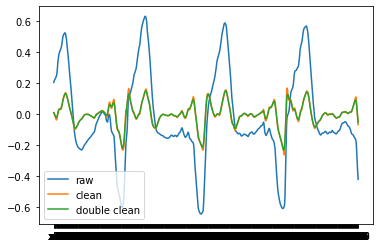

In [357]:
idx = 1215
ecg = df_train.iloc[idx, :]
fil = ~ecg.isna()
ecg = ecg[fil]
label = ecg[-1]
print(label)
ecg = ecg[:-1]/1000

ecg_clean = nk.ecg_clean(ecg, sampling_rate=300, method='biosppy')

signals, info = nk.ecg_process(ecg_clean, sampling_rate=300)

start = 0
end = 900
plt.plot(ecg[start:end], label='raw')
plt.plot(ecg_clean[start:end], label='clean')
plt.plot(signals['ECG_Clean'].iloc[start:end], label='double clean')
plt.legend()
plt.show()


0.0


/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


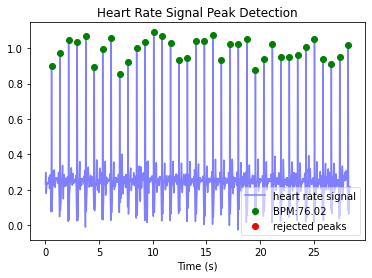

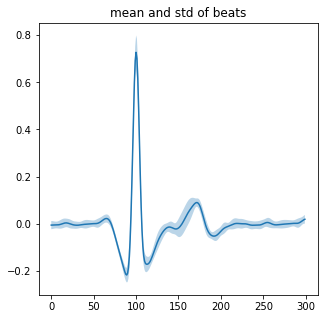

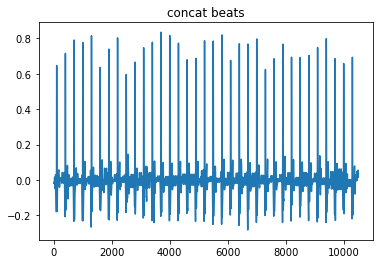

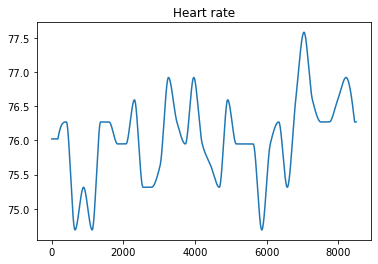

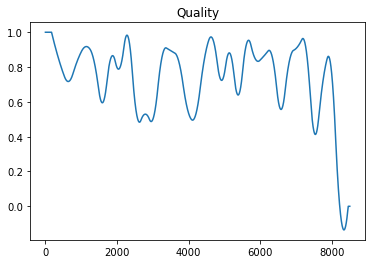

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,idx
0,-0.016217,-0.015298,-0.014739,-0.014594,-0.014855,-0.015452,-0.016265,-0.017143,-0.017930,-0.018486,...,0.039998,0.041472,0.041949,0.041721,0.040965,0.039704,0.037826,0.035159,0.0,10
1,0.008447,0.007421,0.006714,0.006393,0.006461,0.006862,0.007501,0.008254,0.008985,0.009563,...,0.000783,0.000063,-0.000473,-0.000758,-0.000777,-0.000562,-0.000169,0.000346,0.0,10
2,-0.019191,-0.014049,-0.009267,-0.004969,-0.001178,0.002111,0.004886,0.007104,0.008700,0.009609,...,-0.013164,-0.012679,-0.011187,-0.008736,-0.005463,-0.001567,0.002724,0.007182,0.0,10
3,-0.018770,-0.020221,-0.020978,-0.021075,-0.020626,-0.019791,-0.018734,-0.017597,-0.016480,-0.015440,...,0.019091,0.018735,0.015862,0.010393,0.002747,-0.006150,-0.014946,-0.022044,0.0,10
4,-0.002815,-0.000551,0.001568,0.003446,0.005022,0.006265,0.007153,0.007662,0.007765,0.007441,...,0.011149,0.012559,0.013973,0.015256,0.016270,0.016873,0.016926,0.016310,0.0,10
5,0.025447,0.023527,0.020851,0.017580,0.013889,0.009949,0.005918,0.001958,-0.001752,-0.005010,...,0.033062,0.035888,0.038120,0.039630,0.040297,0.040026,0.038778,0.036589,0.0,10
6,-0.027905,-0.023282,-0.017899,-0.011688,-0.004848,0.002214,0.009033,0.015269,0.020844,0.025969,...,0.011581,0.013518,0.015762,0.018340,0.021222,0.024304,0.027394,0.030224,0.0,10
7,-0.007158,-0.005761,-0.004582,-0.003689,-0.003098,-0.002774,-0.002636,-0.002570,-0.002456,-0.002184,...,0.004358,0.004272,0.004952,0.006685,0.009573,0.013448,0.017886,0.022309,0.0,10
8,0.011687,0.012547,0.012887,0.012761,0.012209,0.011228,0.009764,0.007735,0.005090,0.001874,...,-0.000450,0.001283,0.003190,0.004464,0.004383,0.002485,-0.001369,-0.006998,0.0,10
9,0.009819,0.012890,0.014528,0.014267,0.011989,0.007919,0.002564,-0.003378,-0.009120,-0.013912,...,0.008860,0.011841,0.014566,0.016875,0.018650,0.019823,0.020371,0.020303,0.0,10


In [369]:
idx = 10
#ecg = df_train.loc[2948, :].iloc[:]
ecg = df_train.iloc[idx, :]
fil = ~ecg.isna()
ecg = ecg[fil]
label = ecg[-1]
print(label)
ecg = ecg[:-1]/1000




# Process it
ecg_clean = nk.ecg_clean(ecg, sampling_rate=300, method='biosppy')
signals, info = nk.ecg_process(ecg_clean, sampling_rate=300)
ecg = signals['ECG_Clean']
before = 100
after = 200
working_data, measures = hp.process(ecg.values, 300.0)
hp.plotter(working_data, measures)
plt.show()

num_dirty = len(working_data['removed_beats'])
num_clean = len(working_data['peaklist'])


beats = []
for peak_idx in info['ECG_R_Peaks']:
    beat = ecg[peak_idx-before:peak_idx+after].values
    if (len(beat) == before + after):
        beats.append(beat)

num_beats = len(info['ECG_R_Peaks'])

df = pd.DataFrame(beats)
df['label'] = label

mean = np.mean(beats, axis=0)
std = np.std(beats, axis=0)

# plots
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
ax.plot(mean)
ax.fill_between(range(before+after), mean-std, mean + std, alpha=0.3)
plt.title('mean and std of beats')
plt.show()

beat_signal = np.array(beats).flatten()
plt.plot(beat_signal)
plt.title('concat beats')
plt.show()

signals['ECG_Rate'].plot()
plt.title('Heart rate')
plt.show()

signals['ECG_Quality'].plot()
plt.title('Quality')
plt.show()

df['idx'] = idx
df

## Extract Single Beats

In [370]:
def get_peaks(beat):
    peaks = []
    for i in range(1, 299):
        if ((beat.iloc[i]<beat.iloc[i-1] and beat.iloc[i]<beat.iloc[i+1]) or (beat.iloc[i]>beat.iloc[i-1] and beat.iloc[i]>beat.iloc[i+1])):
            peaks.append(i)
    return np.asarray(peaks)

def compute_num_diffs(peaks, beat):
    num_step = 0
    for i in range(len(peaks)-1):
        diff = abs(beat.iloc[peaks[i]] - beat.iloc[peaks[i+1]])
        if (diff > 30/1000):
            num_step += 1
    return num_step

def num_jumps(beat):
    peaks = get_peaks(beat)
    num_jumps = compute_num_diffs(peaks, beat)

    return num_jumps



In [378]:
idx = 2
#ecg = df_train.loc[2948, :].iloc[:]
ecg = df_train.iloc[idx, :]
fil = ~ecg.isna()
ecg = ecg[fil]
label = ecg[-1]
print(label)
ecg = ecg[:-1]/1000




# Process it
ecg_clean = nk.ecg_clean(ecg, sampling_rate=300, method='biosppy')
signals, info = nk.ecg_process(ecg_clean, sampling_rate=300)
ecg = signals['ECG_Clean']
before = 100
after = 200

num_dirty = len(working_data['removed_beats'])
num_clean = len(working_data['peaklist'])


beats = []
for peak_idx in info['ECG_R_Peaks']:
    beat = ecg[peak_idx-before:peak_idx+after].values
    if (len(beat) == before + after):
        beats.append(beat)

num_jumps(pd.DataFrame(beats).iloc[0, :])

2.0


11

In [389]:
def extract_beats(data):
    dfs = []
    for idx in tqdm(range(len(data))):
        # extract ecg
        ecg = data.iloc[idx, :]
        fil = ~ecg.isna()
        ecg = ecg[fil]
        label = ecg[-1]
        ecg = ecg[:-1]/1000

        
        # clean signal
        ecg_signal = nk.signal_sanitize(ecg.values)
        ecg_clean = nk.ecg_clean(ecg, sampling_rate=300, method='biosppy')

        # process signal
        signals, info = nk.ecg_process(ecg_clean, sampling_rate=300)

        ecg = signals['ECG_Clean']

        # extract beats from signal
        before = 100
        after = 200

        beats = []
        hr = []
        jump_counts = []
        qualities = []
        for peak_idx in info['ECG_R_Peaks']:
            beat = ecg[peak_idx-before:peak_idx+after].values
            if (len(beat) == before + after):
                beats.append(beat)
                hr.append(signals['ECG_Rate'].iloc[peak_idx])
                jump_count = num_jumps(ecg[peak_idx-before:peak_idx+after])
                jump_counts.append(jump_count)
                qualities.append(signals['ECG_Quality'].iloc[peak_idx])

                

        df = pd.DataFrame(beats)
        df['label'] = label
        df['idx'] = idx
        df['Quality'] = qualities
        df['hr'] = hr
        df['hrv'] = signals['ECG_Rate'].std()
        df['jump_count'] = jump_counts

        dfs.append(df)
        
    # normalize
    df_beats = pd.concat(dfs)
    return df_beats

print('training data ...')
train_beats = extract_beats(df_train)
train_beats.to_csv('train_beats.csv')

print('validation data ...')
val_beats = extract_beats(df_val)
val_beats.to_csv('val_beats.csv')

print('testing data ... ')
test_beats = extract_beats(df_test)
test_beats.to_csv('test_beats.csv')

training data ...


  0%|          | 19/3837 [00:06<22:46,  2.79it/s]/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
100%|██████████| 3837/3837 [22:33<00:00,  2.83it/s]


validation data ...


100%|██████████| 1280/1280 [07:33<00:00,  2.82it/s]


testing data ... 


 84%|████████▍ | 2872/3411 [16:51<03:08,  2.87it/s]/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/neurokit2/signal/signal_period.py:60: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
 84%|████████▍ | 2872/3411 [16:51<03:09,  2.84it/s]


ValueError: cannot convert float NaN to integer

# Explore Beats

In [479]:
def plot_mean(df):
    mean = df.mean().iloc[:300].values
    std = df.std().iloc[:300].values
    fig, ax = plt.subplots(ncols=1, nrows=1  , figsize=(7, 5))
    mean_hr = df.mean()['hr']
    mean_quality = df.mean()['Quality']
    ax.plot(mean, label=f'HR: {mean_hr:.3f}\nQuality: {mean_quality}')
    ax.fill_between(range(300), mean-std, mean+std, alpha=0.3)
    plt.title(f'class: {df["label"].iloc[0]}, samples: {len(df)}')
    plt.legend()
    plt.show()

In [484]:
df_beats = pd.read_csv('train_beats.csv', index_col=0)
df_beats

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,label,idx,Quality,hr,hrv,jump_count
0,0.017179,0.000287,-0.016494,-0.032617,-0.047613,-0.061124,-0.072911,-0.082830,-0.090794,-0.096732,...,-0.014190,-0.016152,-0.017784,-0.019020,1.0,0,5.201437e-01,90.641120,15.538490,13
1,0.068116,0.076158,0.083875,0.091262,0.098360,0.105211,0.111788,0.117933,0.123316,0.127437,...,-0.023606,-0.025023,-0.026222,-0.027018,1.0,0,1.110223e-16,113.207547,15.538490,13
2,0.038653,0.049052,0.059700,0.070283,0.080484,0.090034,0.098736,0.106472,0.113159,0.118693,...,-0.001856,-0.001911,-0.002064,-0.002335,1.0,0,8.135745e-01,114.649682,15.538490,9
3,-0.007869,-0.007316,-0.006653,-0.005906,-0.005118,-0.004344,-0.003637,-0.003037,-0.002567,-0.002228,...,-0.013379,-0.012198,-0.010968,-0.009707,1.0,0,8.478314e-01,63.380282,15.538490,7
4,-0.006001,-0.005278,-0.004276,-0.003054,-0.001676,-0.000197,0.001347,0.002913,0.004435,0.005797,...,-0.124645,-0.098247,-0.075520,-0.056939,1.0,0,8.084713e-01,67.924528,15.538490,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,-0.006134,-0.005683,-0.005195,-0.004745,-0.004423,-0.004312,-0.004469,-0.004909,-0.005601,-0.006477,...,-0.003168,-0.003042,-0.003019,-0.003127,0.0,3836,6.880578e-01,64.056940,6.207545,9
24,-0.005751,-0.005317,-0.004910,-0.004558,-0.004267,-0.004021,-0.003795,-0.003573,-0.003357,-0.003168,...,-0.002668,-0.002831,-0.002941,-0.002972,0.0,3836,9.247594e-01,62.717770,6.207545,9
25,-0.002314,-0.002483,-0.002668,-0.002831,-0.002941,-0.002972,-0.002917,-0.002790,-0.002624,-0.002472,...,-0.016123,-0.016952,-0.017814,-0.018684,0.0,3836,4.347821e-01,61.224490,6.207545,9
26,-0.008238,-0.006109,-0.003957,-0.001654,0.000934,0.003890,0.007194,0.010719,0.014251,0.017556,...,-0.008029,-0.007725,-0.007398,-0.007071,0.0,3836,1.151381e-01,57.507987,6.207545,8


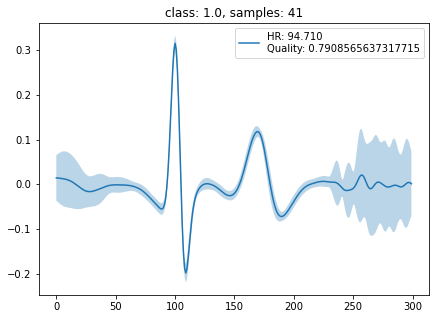

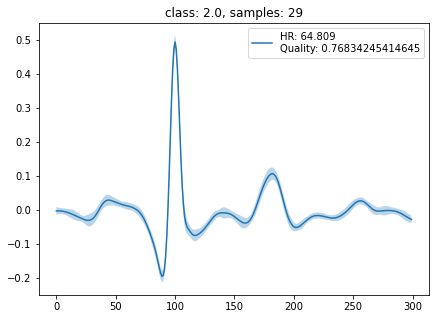

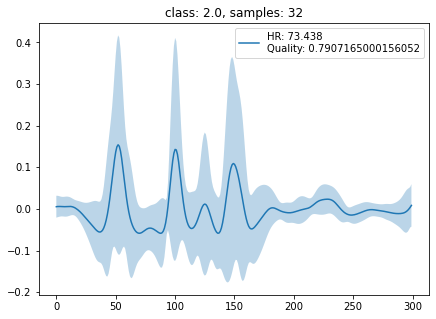

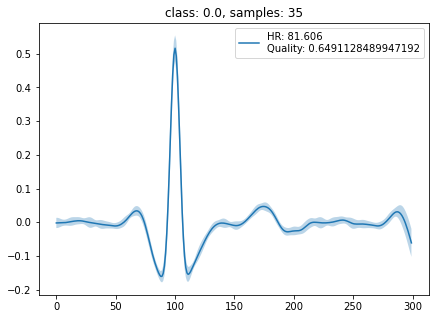

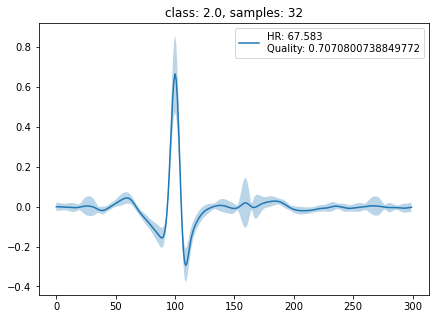

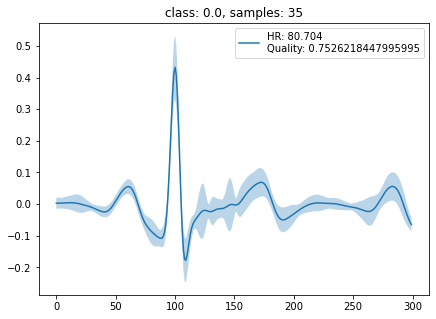

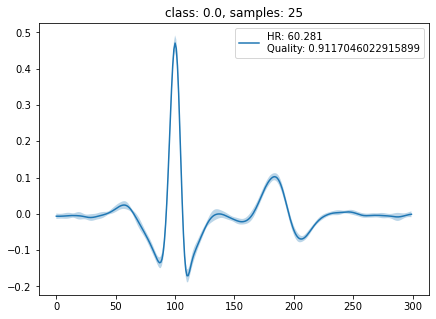

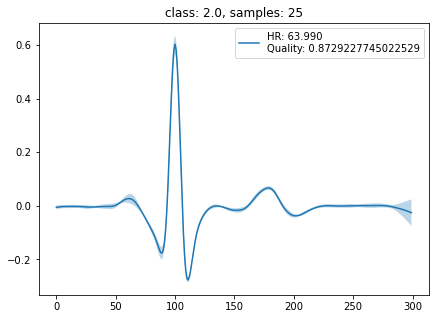

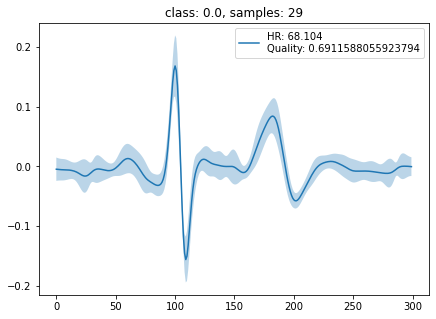

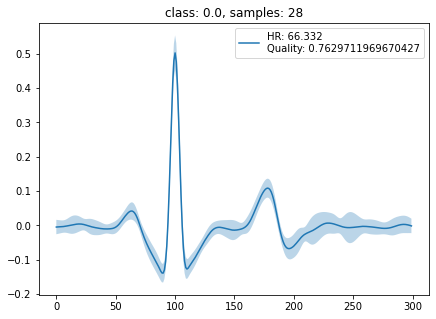

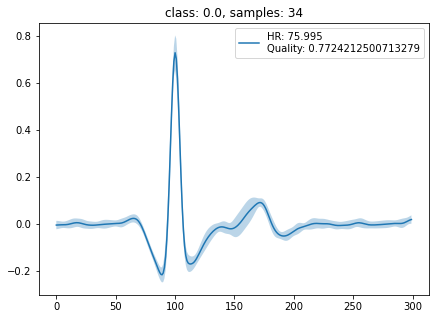

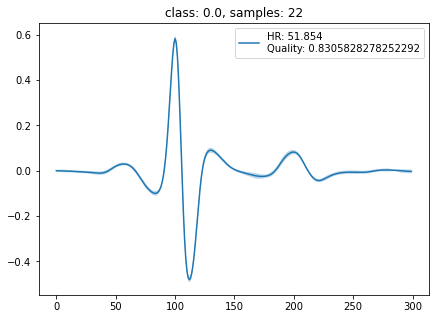

In [485]:
for idx, person in df_beats[df_beats['Quality'] > 0].groupby('idx'):
    person = person[person['Quality'] > 0]
    plot_mean(person)
    if idx > 10:
        break

## Remove outliers per class

In [547]:
def remove_outliers_per_class(df_beats):
    dfs = []
    for c in range(4):    
        class_0 = df_beats[df_beats['label'] == c]
        X = class_0.iloc[:, :300].values


        iforst = IsolationForest(n_estimators=1000, n_jobs=-1, contamination='auto')
        outliers = iforst.fit_predict(X)
        mask = outliers != -1
        X_new = class_0.iloc[mask, :] 

        print(f'removed: {len(class_0) - len(X_new)} samples for class {c}')
        dfs.append(X_new)
    return pd.concat(dfs)



In [548]:
df_train = pd.read_csv('train_beats.csv', index_col=0)
df_val = pd.read_csv('val_beats.csv', index_col=0)

train_clean = remove_outliers_per_class(df_train)
val_clean = remove_outliers_per_class(df_val)

train_clean.to_csv('train_clean.csv')
val_clean.to_csv('val_clean.csv')


removed: 2100 samples for class 0
removed: 370 samples for class 1
removed: 675 samples for class 2
removed: 220 samples for class 3
removed: 641 samples for class 0
removed: 63 samples for class 1
removed: 246 samples for class 2
removed: 61 samples for class 3


In [ ]:
beats_clean = train_clean

In [489]:
qualities = beats_clean.groupby('label')['Quality']

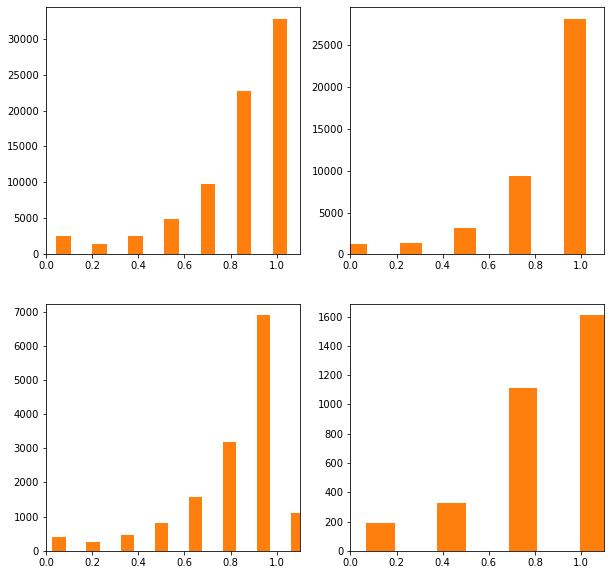

In [490]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for i, c in enumerate(qualities):
    row = i % 2
    col = i // 2
    ax[row, col].hist(c)
    ax[row, col].set_xlim(0, 1.1)
plt.show()

In [394]:
df_beats = pd.read_csv('train_beats.csv', index_col=0)
df_beats.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,label,idx,Quality,hr,hrv,jump_count
0,0.017179,0.000287,-0.016494,-0.032617,-0.047613,-0.061124,-0.072911,-0.082830,-0.090794,-0.096732,...,-0.014190,-0.016152,-0.017784,-0.019020,1.0,0,5.201437e-01,90.641120,15.53849,13
1,0.068116,0.076158,0.083875,0.091262,0.098360,0.105211,0.111788,0.117933,0.123316,0.127437,...,-0.023606,-0.025023,-0.026222,-0.027018,1.0,0,1.110223e-16,113.207547,15.53849,13
2,0.038653,0.049052,0.059700,0.070283,0.080484,0.090034,0.098736,0.106472,0.113159,0.118693,...,-0.001856,-0.001911,-0.002064,-0.002335,1.0,0,8.135745e-01,114.649682,15.53849,9
3,-0.007869,-0.007316,-0.006653,-0.005906,-0.005118,-0.004344,-0.003637,-0.003037,-0.002567,-0.002228,...,-0.013379,-0.012198,-0.010968,-0.009707,1.0,0,8.478314e-01,63.380282,15.53849,7
4,-0.006001,-0.005278,-0.004276,-0.003054,-0.001676,-0.000197,0.001347,0.002913,0.004435,0.005797,...,-0.124645,-0.098247,-0.075520,-0.056939,1.0,0,8.084713e-01,67.924528,15.53849,11


In [491]:
class_support = beats_clean.groupby('label').count()['idx']
class_support

label
0.0    76723
1.0    14692
2.0    43240
3.0     3241
Name: idx, dtype: int64

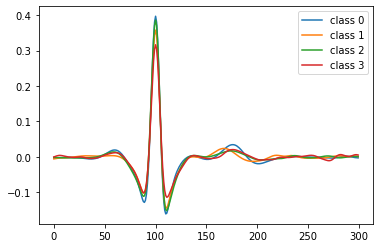

In [492]:
m = beats_clean.groupby('label').mean().iloc[:, :-5].values

for i, mi in enumerate(m):
    plt.plot(mi, label=f'class {i}')

plt.legend()
plt.show()

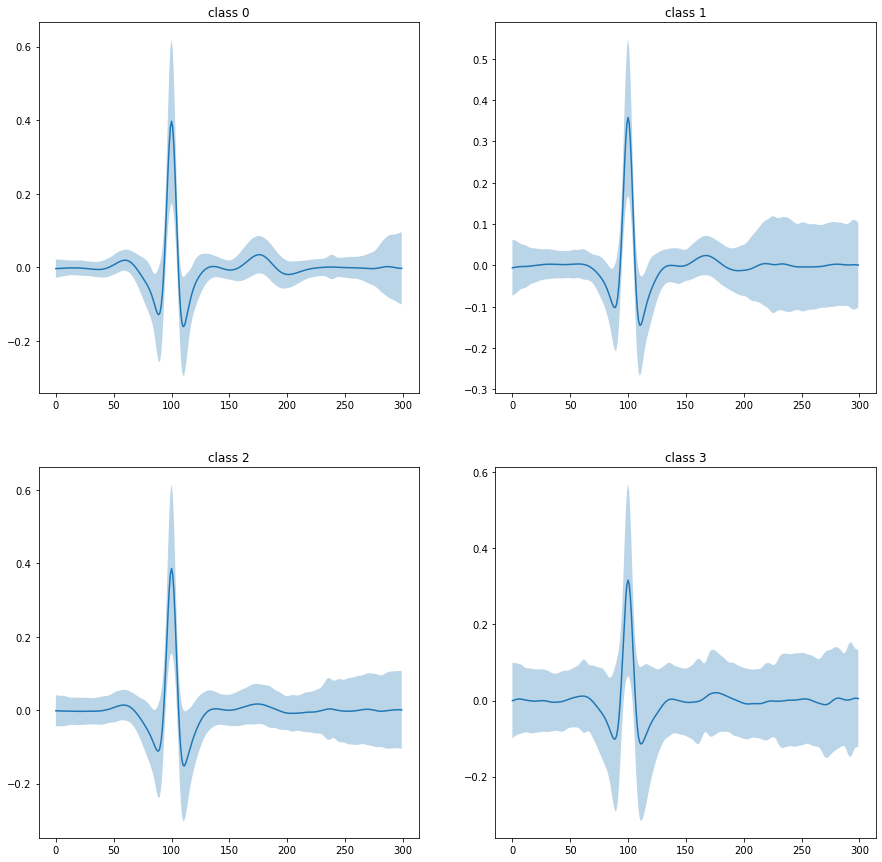

In [493]:
mean = beats_clean.groupby('label').mean().iloc[:, :300].values
std = beats_clean.groupby('label').std().iloc[:, :300].values

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        ax[i, j].set_title(f'class {i*2 + j}')
        ax[i, j].plot(mean[i*2 + j])
        ax[i, j].fill_between(range(300), mean[i*2 + j]-std[i*2 + j], mean[i*2 + j] + std[i*2 + j], alpha=0.3)

plt.show()

In [494]:
beats_clean.groupby('label').std()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,idx,Quality,hr,hrv,jump_count
label,,,,,,,,,,,,,,,,,,,,,
0.0,0.024818,0.024513,0.024229,0.023904,0.023493,0.022999,0.022466,0.021949,0.021484,0.021079,...,0.092844,0.094305,0.095689,0.097075,0.098636,1112.666659,0.229909,14.445358,5.721555,2.929143
1.0,0.067897,0.066640,0.065424,0.063894,0.061903,0.059569,0.057226,0.055274,0.053958,0.053199,...,0.108560,0.108266,0.106927,0.105080,0.103403,1092.858597,0.225832,32.032701,6.348031,3.018681
2.0,0.043758,0.042162,0.041551,0.041554,0.041738,0.041812,0.041656,0.041259,0.040651,0.039881,...,0.105159,0.105396,0.105642,0.105848,0.106036,1096.528116,0.225940,27.169624,8.298305,3.479415
3.0,0.099330,0.097969,0.096595,0.095253,0.094036,0.093036,0.092204,0.091299,0.090048,0.088389,...,0.137535,0.132025,0.128990,0.128076,0.128129,1085.607004,0.247766,29.953762,9.152728,6.054546


In [495]:
beats_clean.groupby('label').mean()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,idx,Quality,hr,hrv,jump_count
label,,,,,,,,,,,,,,,,,,,,,
0.0,-0.003325,-0.003151,-0.002961,-0.002761,-0.002559,-0.002365,-0.002183,-0.002020,-0.001877,-0.001754,...,-0.001569,-0.002016,-0.002376,-0.002638,-0.002801,1919.938793,0.795519,74.375234,4.875749,10.464424
1.0,-0.005741,-0.005243,-0.004699,-0.004164,-0.003689,-0.003313,-0.003056,-0.002911,-0.002853,-0.002837,...,0.001726,0.001719,0.001548,0.001219,0.000771,1931.837258,0.783552,105.086693,17.254957,12.295535
2.0,-0.001484,-0.001703,-0.001872,-0.001995,-0.002086,-0.002159,-0.002231,-0.002312,-0.002409,-0.002519,...,0.001363,0.001404,0.001348,0.001162,0.000825,1860.615310,0.801534,84.711833,9.557458,11.180990
3.0,-0.000279,0.000815,0.001866,0.002807,0.003558,0.004042,0.004204,0.004036,0.003584,0.002940,...,0.005265,0.005931,0.006168,0.005906,0.005162,1979.102746,0.756014,87.764779,20.186573,15.618945


# Baselines

In [496]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RFC


In [543]:
#df_beats = pd.read_csv('train_beats.csv', index_col=0)

dfs = []
for idx, beats in tqdm(beats_clean.groupby('idx')):
    label = int(beats['label'].iloc[0])
    std_beats = np.mean(beats.std()[:300])
    mean_beats = np.mean(beats.mean()[:300])
    maximum = np.max(beats.max()[:300])
    minimum = np.min(beats.min()[:300])
    hrv = beats['hrv'].iloc[0]
    mean_hr = np.mean(beats['hr'])
    mean_quality = np.mean(beats['Quality'])
    std_quality = np.mean(beats['Quality'])
    mean_counts = np.mean(beats['jump_count'])
    std_counts = np.std(beats['jump_count'])
    

    features = [std_beats, mean_beats, maximum, minimum, hrv, mean_hr, mean_quality, std_quality, mean_counts, std_counts, label]
    dfs.append(pd.DataFrame(features).T)
df = pd.concat(dfs)
df = df.fillna(0)
df

100%|██████████| 3835/3835 [00:10<00:00, 368.90it/s]


,0,1,2,3,4,5,6,7,8,9,10
0,0.033663,-0.000597,0.347752,-0.258181,15.538490,94.709983,0.790857,0.790857,11.219512,1.854621,1.0
0,0.014266,-0.000855,0.528087,-0.234437,0.634023,64.808904,0.768342,0.768342,12.862069,1.960368,2.0
0,0.075751,-0.000649,0.694410,-0.235657,8.663092,73.437700,0.790717,0.790717,10.125000,1.672386,2.0
0,0.015486,-0.000119,0.596791,-0.215313,1.160545,81.612192,0.631082,0.631082,12.472222,2.576454,0.0
0,0.031743,-0.000353,0.789997,-0.373157,3.549551,67.770630,0.685653,0.685653,13.333333,2.670452,2.0
...,...,...,...,...,...,...,...,...,...,...,...
0,0.011756,-0.001097,0.762776,-0.277888,1.007594,72.512625,0.654246,0.654246,8.742857,0.730669,0.0
0,0.030980,-0.000079,0.563977,-0.434649,1.406611,60.982782,0.690965,0.690965,11.925926,1.961215,0.0
0,0.024660,-0.000309,0.349008,-0.374583,5.583622,80.949058,0.755757,0.755757,10.805556,1.663655,0.0
0,0.024083,0.000064,0.273326,-0.397535,14.303417,70.115129,0.720850,0.720850,10.366667,1.991370,1.0


In [544]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2)

In [545]:
svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)
print(classification_report(y_test, y_hat))
score(y_test, y_hat)

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       470
         1.0       0.47      0.71      0.57        65
         2.0       0.56      0.21      0.31       206
         3.0       0.24      0.65      0.35        26

    accuracy                           0.66       767
   macro avg       0.51      0.61      0.51       767
weighted avg       0.67      0.66      0.64       767



0.6623207301173403

In [582]:
rfc = RFC(n_estimators=1000, n_jobs=-1, class_weight='balanced')
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

print(classification_report(y_test, y_hat))
score(y_test, y_hat)

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       151
         1.0       0.52      0.58      0.55        19
         2.0       0.63      0.49      0.55        79
         3.0       0.71      0.71      0.71         7

    accuracy                           0.73       256
   macro avg       0.67      0.67      0.66       256
weighted avg       0.72      0.73      0.72       256



0.73046875

# LSTM Autoencoder

In [313]:
import torch

import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch import nn, optim

import torch.nn.functional as F

from tqdm import trange


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = 'cpu'

def create_dataset(df):
    sequence = df.astype(np.float32).to_numpy().tolist()

    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequence]

    n_seq, seq_len, n_features = torch.stack(dataset).shape

    return dataset, seq_len, n_features

df_beats = pd.read_csv('train_clean.csv', index_col=0)

df_beats_clean = df_beats

print(len(df_beats_clean))


train_beats, val_beats = train_test_split(df_beats_clean.iloc[:, :-4], test_size=0.3)
val_beats, test_beats = train_test_split(val_beats, test_size=0.5)

CLASS = 0

train_dataset, seq_len, n_features = create_dataset(train_beats[train_beats['label'] == CLASS].iloc[:, :-1])
val_dataset, _, _ = create_dataset(val_beats[val_beats['label'] == CLASS].iloc[:, :-1])
test_normal_dataset, _, _ = create_dataset(test_beats[test_beats['label'] == CLASS].iloc[:, :-1])
test_anomaly_dataset, _, _ = create_dataset(test_beats.iloc[:, :-1])


class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(Encoder, self).__init__()

        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

        self.rnn1 = nn.LSTM(
            input_size=n_features,
            hidden_size=self.hidden_dim,
            num_layers=1,
            batch_first=True
        )

        self.rnn2 = nn.LSTM(
            input_size=self.hidden_dim,
            hidden_size=embedding_dim,
            num_layers=1,
            batch_first=True
        )

    def forward(self, x):
        x = x.reshape((1, self.seq_len, self.n_features))

        x, (_, _) = self.rnn1(x)
        x, (hidden_n, _) = self.rnn2(x)

        return hidden_n.reshape((self.n_features, self.embedding_dim))


class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)



class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x


model = RecurrentAutoencoder(seq_len, n_features, 128)
model = model.to(device)



def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0

  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    t = trange(len(train_dataset))
    t.set_description(desc=f'Epoch: {epoch}')

    for i in t:
      seq_true = train_dataset[i]
      optimizer.zero_grad()

      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)
      

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())
      t.set_postfix(loss=f'{np.mean(train_losses[-100:]):.3f}')

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history



model, history = train_model(
  model,
  train_dataset,
  val_dataset,
  n_epochs=10
)


MODEL_PATH = f'model_{CLASS}.pth'
torch.save(model, MODEL_PATH)


fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show()

28408


Epoch: 1:   1%|          | 79/12266 [00:16<42:11,  4.81it/s, loss=15.844]


KeyboardInterrupt: 

In [ ]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

In [ ]:
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True)

In [ ]:
THRESHOLD = 26

In [ ]:
predictions, pred_losses = predict(model, test_normal_dataset)
sns.distplot(pred_losses, bins=50, kde=True)

In [ ]:
correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_normal_dataset)}')

# Keras Autoencoder

In [584]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed


CLASS = 0

In [501]:
df_beats = pd.read_csv('train_clean.csv', index_col=0)

train_beats, test_beats = train_test_split(df_beats.iloc[:, :301], test_size=0.2)

In [502]:
x_train_0 = train_beats[train_beats['label'] == CLASS].iloc[:, :300].values
x_test_0 = test_beats.iloc[:, :301].values

In [503]:
x_train_0 = x_train_0[:, :, np.newaxis]
x_test_0 = x_test_0[:, :, np.newaxis]
x_train_0.shape

(61248, 300, 1)

In [504]:
x_test_0.shape

(27580, 301, 1)

In [601]:
# Model
model_cnn = keras.Sequential(
    [
        layers.Input(shape=(x_train_0.shape[1], x_train_0.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.4),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.4),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)

model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(x_train_0.shape[1], x_train_0.shape[2])))
model_lstm.add(Dropout(rate=0.2))
model_lstm.add(RepeatVector(x_train_0.shape[1]))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dropout(rate=0.2))
model_lstm.add(TimeDistributed(Dense(x_train_0.shape[1])))


model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

history = model_lstm.fit(
    x_train_0,
    x_train_0,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
431/431 [==============================] - 113s 249ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 2/5
431/431 [==============================] - 101s 235ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 3/5
431/431 [==============================] - 101s 235ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 4/5
431/431 [==============================] - 101s 235ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 5/5
431/431 [==============================] - 101s 234ms/step - loss: 0.0077 - val_loss: 0.0077


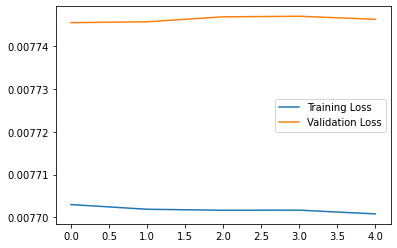

In [602]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

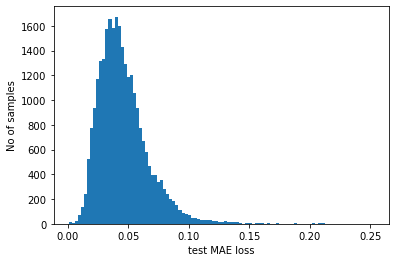

In [603]:
x_test_pred = model_cnn.predict(test_beats.iloc[:, :300].values[:, :, np.newaxis])
test_mae_loss = np.mean(np.abs(x_test_pred - test_beats.iloc[:, :300].values[:, :, np.newaxis]), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))
plt.hist(test_mae_loss, bins=100) # , range=(0, 0.1))
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

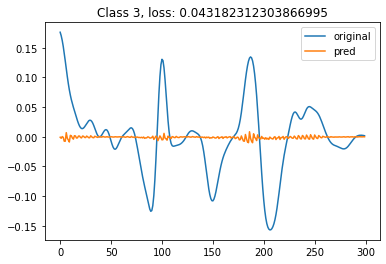

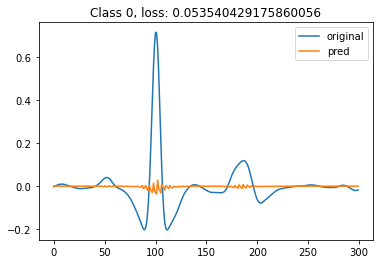

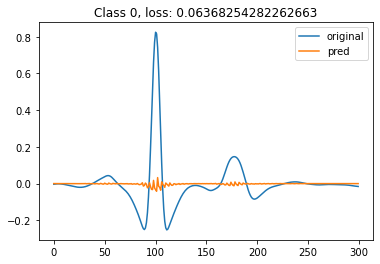

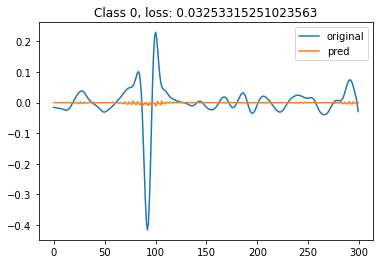

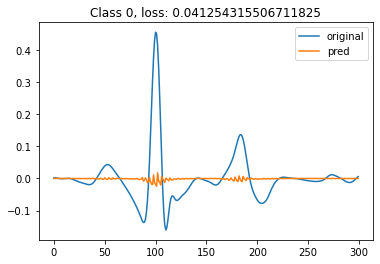

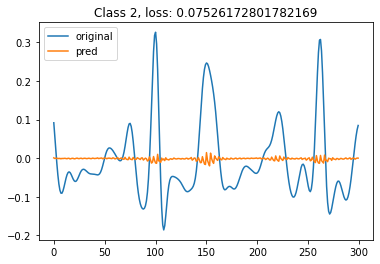

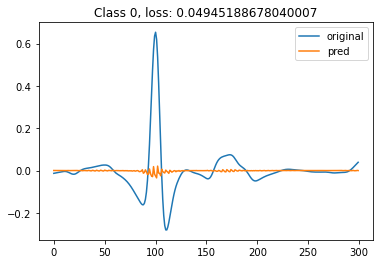

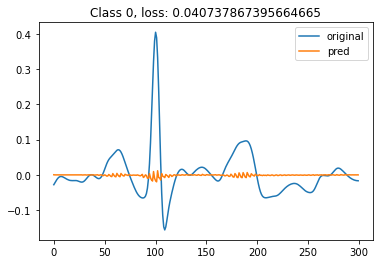

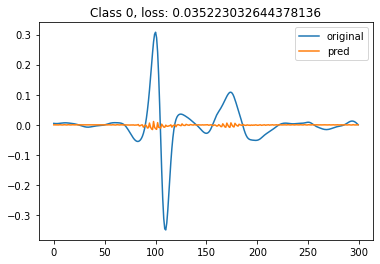

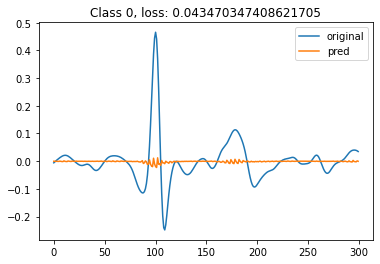

In [604]:
for i in range(10):
    plt.plot(test_beats.iloc[:, :300].values[:, :, np.newaxis][i], label='original')
    plt.plot(x_test_pred[i], label='pred')
    mae = np.mean(np.abs(test_beats.iloc[:, :300].values[:, :, np.newaxis][i] - x_test_pred[i]))
    label = int(test_beats.iloc[i, -1])
    plt.title(f'Class {label}, loss: {mae}')
    plt.legend()
    plt.show()

In [606]:
t0 = test_beats[test_beats['label'] == 0]
t1 = test_beats[test_beats['label'] == 1]
t2 = test_beats[test_beats['label'] == 2]
t3 = test_beats[test_beats['label'] == 3]



model_lstm.evaluate(t0.iloc[:, :300].values[:, :, np.newaxis], t0.iloc[:, :300].values[:, :, np.newaxis])
model_lstm.evaluate(t1.iloc[:, :300].values[:, :, np.newaxis], t1.iloc[:, :300].values[:, :, np.newaxis])
model_lstm.evaluate(t2.iloc[:, :300].values[:, :, np.newaxis], t2.iloc[:, :300].values[:, :, np.newaxis])
model_lstm.evaluate(t3.iloc[:, :300].values[:, :, np.newaxis], t3.iloc[:, :300].values[:, :, np.newaxis])


21/21 [==============================] - 3s 125ms/step - loss: 0.0162


0.016171280294656754

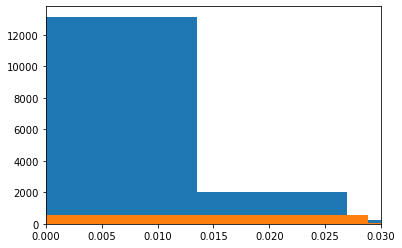

In [609]:
plt.hist(np.mean(np.square(model_cnn.predict(t0.iloc[:, :300].values[:, :, np.newaxis]) - t0.iloc[:, :300].values[:, :, np.newaxis]), axis=1))
plt.hist(np.mean(np.square(model_cnn.predict(t3.iloc[:, :300].values[:, :, np.newaxis]) - t3.iloc[:, :300].values[:, :, np.newaxis]), axis=1))
plt.xlim(0, 0.03)
plt.show()

In [610]:
from tqdm import tqdm 
pred = model_lstm.predict(x_test_0[:, :300, np.newaxis])
print(pred.shape)
rec_loss = [[] for _ in range(4)]

for i in tqdm(range(len(x_test_0))):
    x_true = x_test_0[i, :300, 0]
    x_hat = pred[i, :, 0]
    mse = np.mean(np.square(x_hat - x_true))
    label = x_test_0[i, 300, 0]
    rec_loss[int(label)].append(mse)

ValueError: in user code:

    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.9/site-packages/keras/engine/input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_22 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 300, 1, 1)


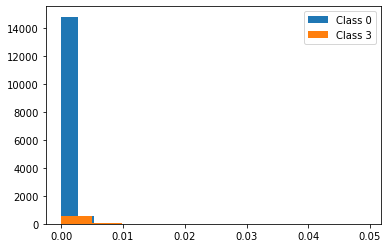

In [ ]:
plt.hist(rec_loss[0], label='Class 0')
plt.hist(rec_loss[3], label='Class 3')
plt.legend()
plt.show()

# 1D CNN

In [523]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import BatchNormalization

In [524]:
df_beats = pd.read_csv('train_clean.csv', index_col=0)
df_beats = beats_clean.iloc[:, :301]

In [525]:
X_train, X_test, y_train, y_test = train_test_split(df_beats.iloc[:, :-1].values, df_beats.iloc[:, -1].values, test_size=0.2)
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]
def to_categorical(y):
    one_hot = [0 for i in range(4)]
    one_hot[int(y)] = 1
    return one_hot

cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

y_train = np.array([to_categorical(y) for y in y_train])


In [526]:
class_w = {
    0: cw[0],
    1: cw[1],
    2: cw[2],
    3: cw[3]
}

In [527]:


model = Sequential()

model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(300,1)))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1, class_weight=class_w)

Epoch 1/10
1552/1552 [==============================] - 21s 13ms/step - loss: 0.9822 - accuracy: 0.5691 - val_loss: 1.2898 - val_accuracy: 0.4501
Epoch 2/10
1552/1552 [==============================] - 20s 13ms/step - loss: 0.8683 - accuracy: 0.6097 - val_loss: 1.5386 - val_accuracy: 0.3428
Epoch 3/10
1552/1552 [==============================] - 20s 13ms/step - loss: 0.8196 - accuracy: 0.6243 - val_loss: 1.6925 - val_accuracy: 0.3757
Epoch 4/10
1552/1552 [==============================] - 20s 13ms/step - loss: 0.7752 - accuracy: 0.6415 - val_loss: 0.9744 - val_accuracy: 0.6062
Epoch 5/10
1552/1552 [==============================] - 21s 13ms/step - loss: 0.7350 - accuracy: 0.6554 - val_loss: 0.9400 - val_accuracy: 0.6265
Epoch 6/10
1552/1552 [==============================] - 20s 13ms/step - loss: 0.6981 - accuracy: 0.6689 - val_loss: 0.9266 - val_accuracy: 0.6074
Epoch 7/10
1552/1552 [==============================] - 20s 13ms/step - loss: 0.6637 - accuracy: 0.6823 - val_loss: 1.0211 -

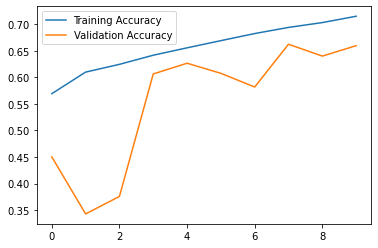

In [528]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [529]:
y_hat = model.predict(X_test)
y_hat

array([[1.31022409e-01, 6.98493302e-01, 1.64815843e-01, 5.66849485e-03],
       [1.02075486e-04, 1.48712173e-01, 8.51185560e-01, 1.76661771e-07],
       [4.61278468e-01, 1.59807980e-01, 3.48539352e-01, 3.03741898e-02],
       ...,
       [3.44563693e-01, 3.68394673e-01, 2.87041008e-01, 6.26279586e-07],
       [4.97512400e-01, 3.01156402e-01, 1.98407501e-01, 2.92377896e-03],
       [1.20406792e-01, 3.03797182e-02, 8.49212766e-01, 6.93657682e-07]],
      dtype=float32)

In [530]:
y_pred = np.argmax(y_hat, axis=-1)
y_pred

array([1, 2, 0, ..., 1, 0, 2])

In [531]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75     15404
         1.0       0.47      0.81      0.60      2899
         2.0       0.64      0.63      0.63      8648
         3.0       0.20      0.65      0.30       629

    accuracy                           0.67     27580
   macro avg       0.54      0.69      0.57     27580
weighted avg       0.73      0.67      0.69     27580



In [532]:
score(y_test, y_pred)

0.6726976069615663

In [553]:
df_beats = pd.read_csv('train_clean.csv', index_col=0)

dfs = []
for idx, beats in tqdm(beats_clean.groupby('idx')):
    label = int(beats['label'].iloc[0])
    std_beats = np.mean(beats.std()[:300])
    mean_beats = np.mean(beats.mean()[:300])
    maximum = np.max(beats.max()[:300])
    minimum = np.min(beats.min()[:300])
    hrv = beats['hrv'].iloc[0]
    mean_hr = np.mean(beats['hr'])
    mean_quality = np.mean(beats['Quality'])
    std_quality = np.mean(beats['Quality'])
    mean_counts = np.mean(beats['jump_count'])
    std_counts = np.std(beats['jump_count'])

    x = beats.iloc[:, :300].values[:, :, np.newaxis]
    
    preds = model.predict(x)
    avg_preds = np.mean(preds, axis=0)

    features = [std_beats, mean_beats, maximum, minimum, hrv, mean_hr, mean_quality, std_quality, mean_counts, std_counts, avg_preds[0], avg_preds[1], avg_preds[2], avg_preds[3], label]
    dfs.append(pd.DataFrame(features).T)
    
df = pd.concat(dfs)
df = df.fillna(0)
df

100%|██████████| 3835/3835 [01:48<00:00, 35.42it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.033663,-0.000597,0.347752,-0.258181,15.538490,94.709983,0.790857,0.790857,11.219512,1.854621,0.053806,0.881421,0.057710,0.007063,1.0
0,0.014266,-0.000855,0.528087,-0.234437,0.634023,64.808904,0.768342,0.768342,12.862069,1.960368,0.226182,0.530043,0.198213,0.045562,2.0
0,0.075751,-0.000649,0.694410,-0.235657,8.663092,73.437700,0.790717,0.790717,10.125000,1.672386,0.130339,0.202436,0.622992,0.044234,2.0
0,0.015486,-0.000119,0.596791,-0.215313,1.160545,81.612192,0.631082,0.631082,12.472222,2.576454,0.587002,0.047079,0.325136,0.040782,0.0
0,0.031743,-0.000353,0.789997,-0.373157,3.549551,67.770630,0.685653,0.685653,13.333333,2.670452,0.517633,0.012387,0.420016,0.049965,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.011756,-0.001097,0.762776,-0.277888,1.007594,72.512625,0.654246,0.654246,8.742857,0.730669,0.761874,0.008211,0.227681,0.002235,0.0
0,0.030980,-0.000079,0.563977,-0.434649,1.406611,60.982782,0.690965,0.690965,11.925926,1.961215,0.494567,0.078647,0.238312,0.188473,0.0
0,0.024660,-0.000309,0.349008,-0.374583,5.583622,80.949058,0.755757,0.755757,10.805556,1.663655,0.418097,0.322990,0.189856,0.069058,0.0
0,0.024083,0.000064,0.273326,-0.397535,14.303417,70.115129,0.720850,0.720850,10.366667,1.991370,0.077899,0.883543,0.034159,0.004399,1.0


In [554]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2)

In [555]:
svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)
print(classification_report(y_test, y_hat))
print('score: ', score(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       475
         1.0       0.53      0.61      0.57        66
         2.0       0.56      0.26      0.36       211
         3.0       0.15      0.80      0.25        15

    accuracy                           0.66       767
   macro avg       0.51      0.63      0.50       767
weighted avg       0.69      0.66      0.65       767

score:  0.6610169491525424


In [556]:
rfc = RFC(n_estimators=1000, n_jobs=-1, class_weight='balanced')
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

print(classification_report(y_test, y_hat))
print('score: ', score(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       475
         1.0       0.91      0.88      0.89        66
         2.0       0.83      0.80      0.82       211
         3.0       0.94      1.00      0.97        15

    accuracy                           0.89       767
   macro avg       0.90      0.90      0.90       767
weighted avg       0.89      0.89      0.89       767

score:  0.894393741851369


In [557]:
df_beats = pd.read_csv('val_clean.csv', index_col=0)

dfs = []
for idx, beats in tqdm(df_beats.groupby('idx')):
    label = int(beats['label'].iloc[0])
    std_beats = np.mean(beats.std()[:300])
    mean_beats = np.mean(beats.mean()[:300])
    maximum = np.max(beats.max()[:300])
    minimum = np.min(beats.min()[:300])
    hrv = beats['hrv'].iloc[0]
    mean_hr = np.mean(beats['hr'])
    mean_quality = np.mean(beats['Quality'])
    std_quality = np.mean(beats['Quality'])
    mean_counts = np.mean(beats['jump_count'])
    std_counts = np.std(beats['jump_count'])

    x = beats.iloc[:, :300].values[:, :, np.newaxis]
    
    preds = model.predict(x)
    avg_preds = np.mean(preds, axis=0)

    features = [std_beats, mean_beats, maximum, minimum, hrv, mean_hr, mean_quality, std_quality, mean_counts, std_counts, avg_preds[0], avg_preds[1], avg_preds[2], avg_preds[3], label]
    dfs.append(pd.DataFrame(features).T)
    
df = pd.concat(dfs)
df = df.fillna(0)
df

100%|██████████| 1279/1279 [00:36<00:00, 34.96it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.014521,-0.003659,0.721442,-0.257450,1.218983,84.864497,0.794681,0.794681,10.365854,1.204789,0.759705,0.021417,0.162747,0.056132,0.0
0,0.029176,-0.000086,0.555742,-0.248489,0.845391,70.147266,0.681359,0.681359,13.593750,3.286900,0.420785,0.209471,0.223903,0.145841,0.0
0,0.017005,-0.000169,0.377045,-0.149026,2.847537,65.628471,0.836890,0.836890,11.322581,1.973814,0.760841,0.076368,0.134488,0.028303,0.0
0,0.013436,-0.001003,1.166373,-0.349636,0.996685,68.876676,0.574136,0.574136,9.548387,1.433217,0.539933,0.030179,0.416579,0.013309,0.0
0,0.032656,0.001458,0.463882,-0.291894,3.193775,79.299595,0.637420,0.637420,12.941176,1.877752,0.195380,0.038734,0.740037,0.025849,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.030143,-0.000977,0.641741,-0.324973,20.241983,68.842007,0.850051,0.850051,8.689655,2.394008,0.138841,0.461970,0.314810,0.084380,0.0
0,0.061136,0.000460,0.656119,-0.301212,22.228082,109.629711,0.799845,0.799845,11.355556,1.416656,0.043177,0.839446,0.092394,0.024983,1.0
0,0.052748,0.000260,0.495380,-0.920967,28.751964,90.274656,0.852605,0.852605,17.828571,5.754430,0.242370,0.151118,0.217556,0.388957,2.0
0,0.017637,-0.000489,0.903844,-0.296212,1.295853,66.752679,0.839062,0.839062,8.800000,1.579029,0.274865,0.064754,0.608553,0.051828,0.0


In [579]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#rfc = RFC(n_estimators=1000, n_jobs=-1, class_weight='balanced')
#rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

print(classification_report(y_test, y_hat))
print('score: ', score(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       151
         1.0       0.43      0.53      0.48        19
         2.0       0.60      0.49      0.54        79
         3.0       1.00      0.29      0.44         7

    accuracy                           0.71       256
   macro avg       0.71      0.54      0.57       256
weighted avg       0.71      0.71      0.71       256

score:  0.71484375


In [568]:
df_beats = pd.read_csv('test_beats.csv', index_col=0)

dfs = []
for idx, beats in tqdm(df_beats.groupby('idx')):
    label = int(beats['label'].iloc[0])
    std_beats = np.mean(beats.std()[:300])
    mean_beats = np.mean(beats.mean()[:300])
    maximum = np.max(beats.max()[:300])
    minimum = np.min(beats.min()[:300])
    hrv = beats['hrv'].iloc[0]
    mean_hr = np.mean(beats['hr'])
    mean_jumps = np.mean(beats['num_jumps'])
    std_jumps = np.std(beats['num_jumps'])

    x = beats.iloc[:, :300].values[:, :, np.newaxis]
    
    preds = model.predict(x)
    avg_preds = np.mean(preds, axis=0)

    features = [std_beats, mean_beats, maximum, minimum, hrv, mean_hr, avg_preds[0], avg_preds[1], avg_preds[2], avg_preds[3], label]
    dfs.append(pd.DataFrame(features).T)
    
df = pd.concat(dfs)
df = df.fillna(0)
df

KeyboardInterrupt: 

In [ ]:
X_test = df.iloc[:, :-1].values
y_hat = rfc.predict(X_test)
y_hat.shape

(3391,)

# Transformer

In [611]:
from tensorflow import keras
from tensorflow.keras import layers
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(4, activation="softmax")(x)
    return keras.Model(inputs, outputs)
df_beats = pd.read_csv('train_clean.csv', index_col=0)
df_beats = beats_clean.iloc[:, :301]

X_train, X_test, y_train, y_test = train_test_split(df_beats.iloc[:, :-1].values, df_beats.iloc[:, -1].values, test_size=0.2)
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]
def to_categorical(y):
    one_hot = [0 for i in range(4)]
    one_hot[int(y)] = 1
    return one_hot

cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

y_train = np.array([to_categorical(y) for y in y_train])

input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)